In [2]:
import torch
import torchvision.transforms as T
from torchvision.models.detection import maskrcnn_resnet50_fpn
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
from PIL import Image

In [3]:
model=maskrcnn_resnet50_fpn(pretrained=True)
model.eval()

/home/bhupen/Python_Learning/image-segmentation/segenv/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/bhupen/Python_Learning/image-segmentation/segenv/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MaskRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=MaskRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Downloading: "https://download.pytorch.org/models/maskrcnn_resnet50_fpn_coco-bf2d0c1e.pth" to /home/bhupen/.cache/torch/hub/checkpoints/maskrcnn_resnet50_fpn_coco-bf2d0c1e.pth


100.0%


MaskRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(in

In [4]:
image_path='people_walking.jpg'
image=Image.open(image_path).convert('RGB')

In [5]:
COCO_INSTANCE_CATEGORY_NAMES = [
    '__background__', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus',
    'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'N/A', 'stop sign',
    'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow',
    'elephant', 'bear', 'zebra', 'giraffe', 'N/A', 'backpack', 'umbrella', 'N/A', 'N/A',
    'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
    'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket',
    'bottle', 'N/A', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl',
    'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
    'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'N/A', 'dining table',
    'N/A', 'N/A', 'toilet', 'N/A', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone',
    'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'N/A', 'book',
    'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush'
]


In [6]:
transform=T.Compose([T.ToTensor()])
image_tensor=transform(image).unsqueeze(0)

with torch.no_grad():
    output=model(image_tensor)

In [7]:
print(output)

[{'boxes': tensor([[2.0410e+03, 7.0120e+02, 2.4465e+03, 1.7382e+03],
        [6.3703e+01, 1.9119e+03, 5.4143e+02, 3.0803e+03],
        [9.8021e+02, 1.5182e+03, 1.3798e+03, 2.7502e+03],
        [2.0977e+02, 3.5773e+02, 5.4834e+02, 1.3154e+03],
        [1.6912e+03, 7.7041e+02, 2.0249e+03, 1.7004e+03],
        [2.9720e+03, 9.1503e+00, 3.2973e+03, 7.0107e+02],
        [4.3541e+03, 1.2257e+03, 4.7440e+03, 1.8560e+03],
        [3.0737e+03, 4.5239e+02, 3.4968e+03, 1.2943e+03],
        [3.2775e+03, 5.6455e+00, 3.6001e+03, 6.0331e+02],
        [4.2283e+03, 8.8679e+02, 4.6666e+03, 1.6580e+03],
        [3.8608e+03, 7.3811e+00, 4.0703e+03, 3.6933e+02],
        [3.5871e+03, 6.0577e+00, 3.9204e+03, 4.9140e+02],
        [1.6851e+03, 6.9961e+00, 1.8956e+03, 2.1875e+02],
        [2.3472e+03, 1.2166e+03, 2.4623e+03, 1.5041e+03],
        [4.3982e+03, 7.4102e+02, 4.6705e+03, 1.2295e+03],
        [1.1420e+03, 3.2537e-01, 1.3897e+03, 1.4498e+02],
        [3.7004e+03, 1.1126e+01, 4.0393e+03, 4.5223e+02],
   

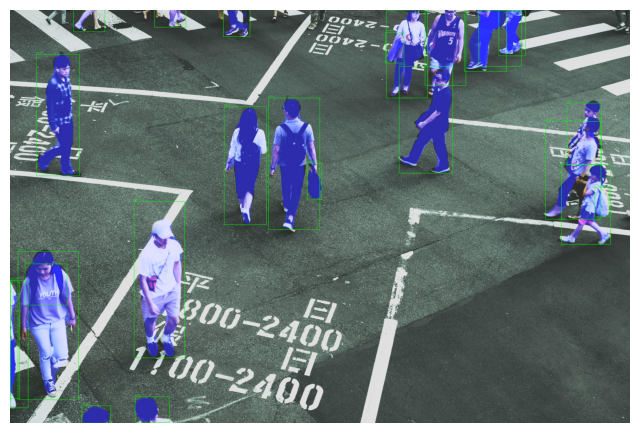

In [9]:
boxes=output[0]['boxes'].cpu().numpy()
labels=output[0]['labels'].cpu().numpy()
masks=output[0]['masks'].cpu().numpy()
scores=output[0]['scores'].cpu().numpy()

threshold=0.6
selected_indices=scores>threshold
boxes=boxes[selected_indices]
masks=masks[selected_indices]

masks=(masks>0.6).squeeze(axis=1)

image_np=np.array(image)


for i in range(len(boxes)):
    x1,y1,x2,y2 = map(int,boxes[i])
    cv.rectangle(image_np,(x1,y1),(x2,y2),(0,255,0),2)

    label=COCO_INSTANCE_CATEGORY_NAMES[labels[i]]

    cv.putText(image_np,label,(x1,y1-10),cv.FONT_HERSHEY_SIMPLEX,0.5,(0,255,0),1,cv.LINE_AA)

    mask=masks[i].astype(np.uint8)*255
    colored_mask=np.zeros_like(image_np)
    colored_mask[:,:,2]=mask

    image_np=cv.addWeighted(image_np,1,colored_mask,0.5,0)

# cv.imwrite('output_img.jpg',cv.cvtColor(image_np,cv.COLOR_BGR2RGB))


plt.figure(figsize=(8,6))
plt.imshow(image_np)
plt.axis('off')
plt.show()